#  Job A Thon data set analysis

# Downloding The required libraries

In [1]:
!pip install pandas
print("-----------------------------------------------------------------------------------------------------------------")
!pip install numpy
print("------------------------------------------------------------------------------------------------------------------")
!pip install matplotlib
print("------------------------------------------------------------------------------------------------------------------")
!pip install seaborn
print("------------------------------------------------------------------------------------------------------------------")
!pip install sklearn

-----------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------


# Importing The Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
import os
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
print(pd.__version__)
print(np.__version__)
#print(matplotlib.__version__)
print(sns.__version__)

1.2.4
1.20.1
0.11.1


# Importing The dataset

In [4]:
os.getcwd()

'C:\\Users\\Lenovo'

In [5]:
os.chdir('C:\\Users\\Lenovo\\Desktop\\job thon')

In [6]:
df_train=pd.read_csv('train_F3fUq2S.csv')
df_test=pd.read_csv('test_Bk2wfZ3.csv')

In [7]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [8]:
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


# Data preprocessing and EDA

In [9]:
df_train.shape,df_test.shape

((1888, 22), (762, 21))

# In The below we are using The describe method to analysis The dataset

In [10]:
df_train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


# Checking of Null values in the given dataset

In [11]:
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [12]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [13]:
column=df_train.columns

In [14]:
columntest=df_test.columns

In [15]:
nume=[feature for feature in column if df_train[feature].dtype != 'O']

In [16]:
numetest=[feature for feature in columntest if df_test[feature].dtype != 'O']

In [17]:
print(len(numetest))
numetest

20


['campaign_id',
 'sender',
 'subject_len',
 'body_len',
 'mean_paragraph_len',
 'day_of_week',
 'is_weekend',
 'category',
 'product',
 'no_of_CTA',
 'mean_CTA_len',
 'is_image',
 'is_personalised',
 'is_quote',
 'is_timer',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience']

In [18]:
print(len(nume))
nume

21


['campaign_id',
 'sender',
 'subject_len',
 'body_len',
 'mean_paragraph_len',
 'day_of_week',
 'is_weekend',
 'category',
 'product',
 'no_of_CTA',
 'mean_CTA_len',
 'is_image',
 'is_personalised',
 'is_quote',
 'is_timer',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience',
 'click_rate']

In [19]:
cate=[feature for feature in column if df_train[feature].dtype == 'O']

In [20]:
catetest=[feature for feature in columntest if df_test[feature].dtype == 'O']

In [21]:
print(len(cate))
cate

1


['times_of_day']

In [22]:
print(len(catetest))
catetest

1


['times_of_day']

<AxesSubplot:title={'center':'click_rate'}, ylabel='Frequency'>

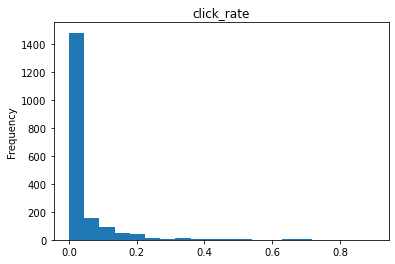

In [23]:
df_train['click_rate'].plot.hist(bins=20,title='click_rate')

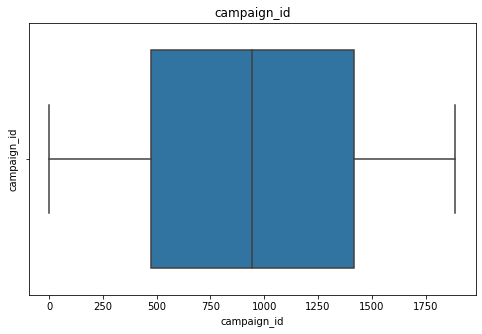

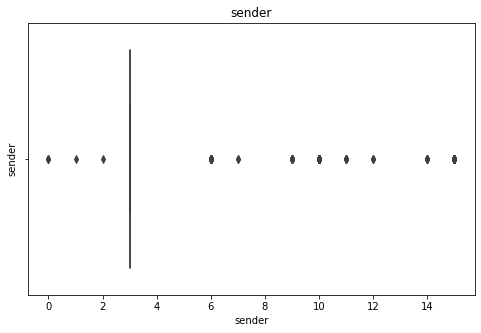

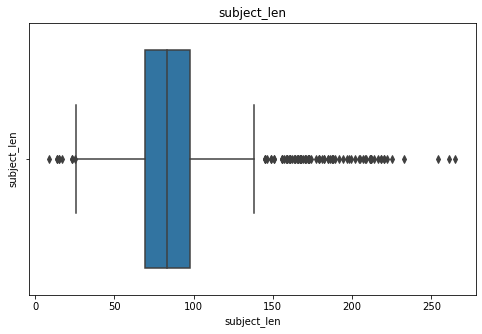

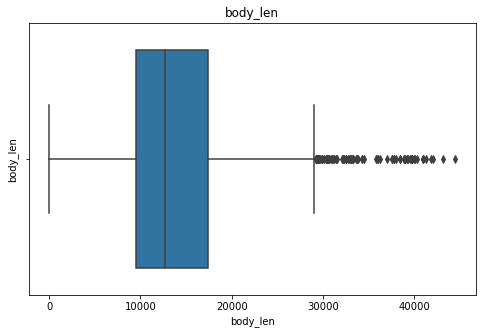

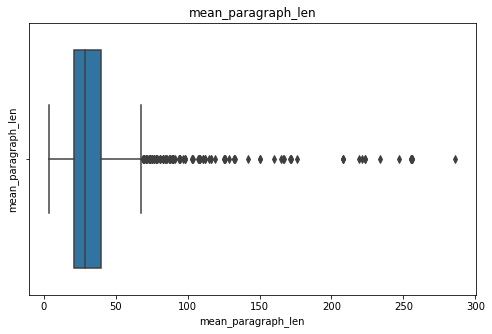

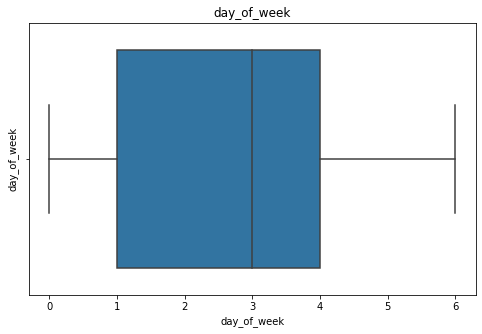

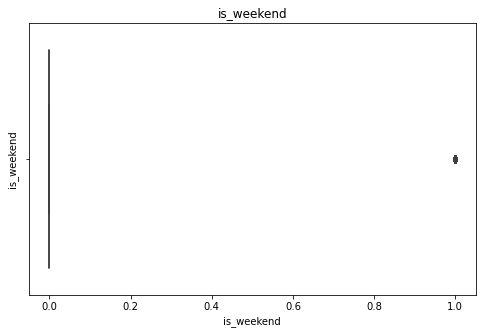

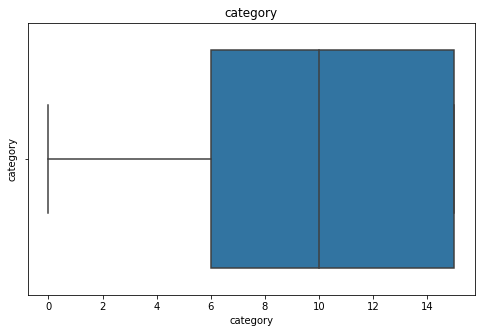

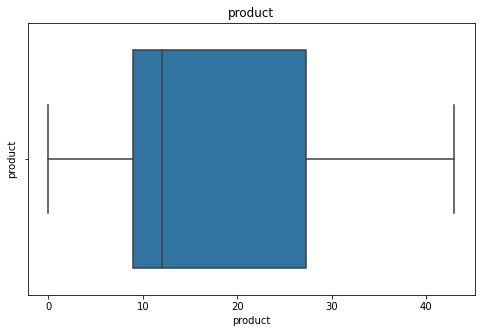

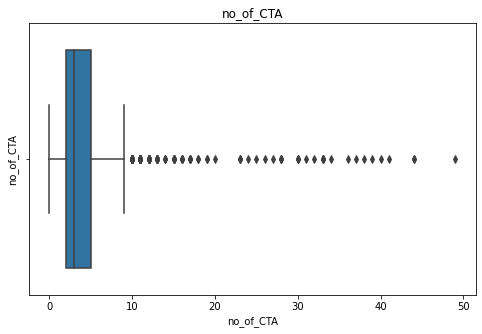

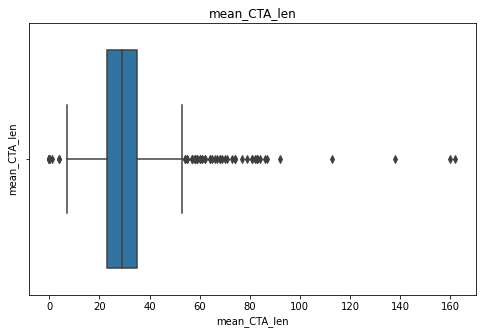

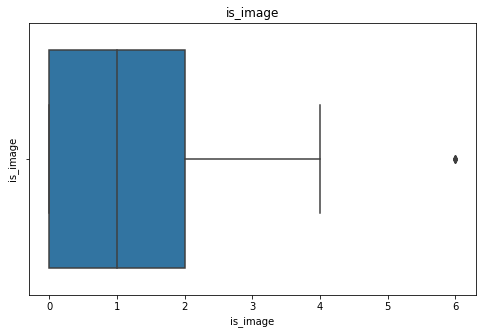

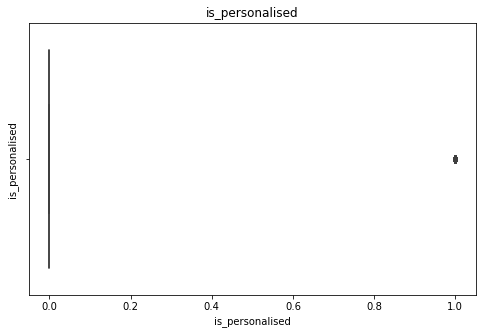

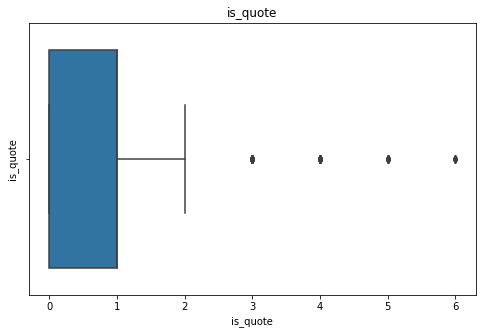

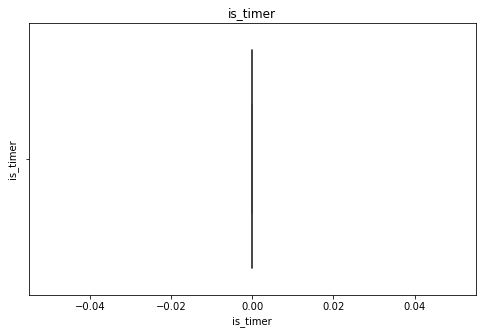

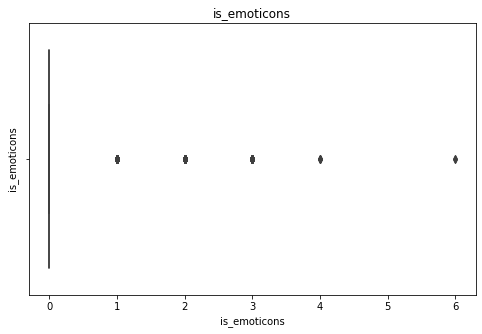

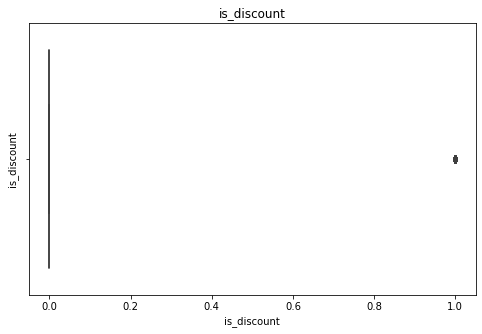

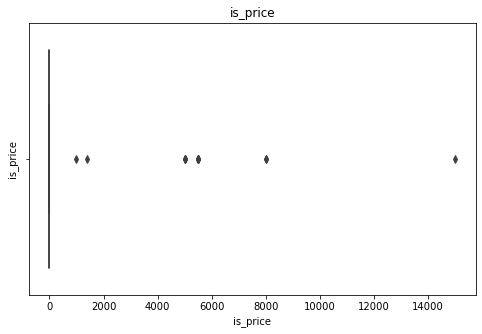

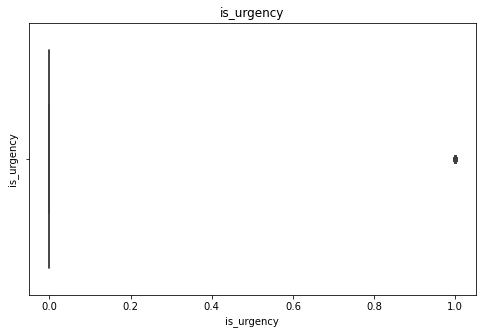

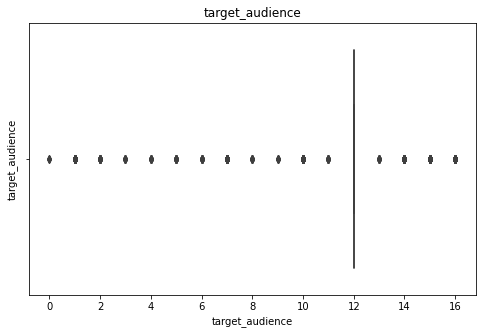

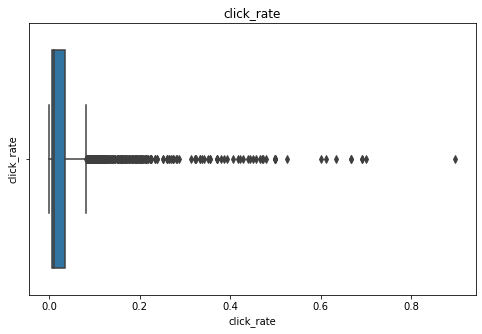

In [24]:
for i in nume:
    mpl.figure(figsize=(8,5))
    sns.boxplot(df_train[i],data=df_train)
    mpl.title(i)
    mpl.ylabel(i)
    mpl.show()

In [25]:
nume

['campaign_id',
 'sender',
 'subject_len',
 'body_len',
 'mean_paragraph_len',
 'day_of_week',
 'is_weekend',
 'category',
 'product',
 'no_of_CTA',
 'mean_CTA_len',
 'is_image',
 'is_personalised',
 'is_quote',
 'is_timer',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience',
 'click_rate']

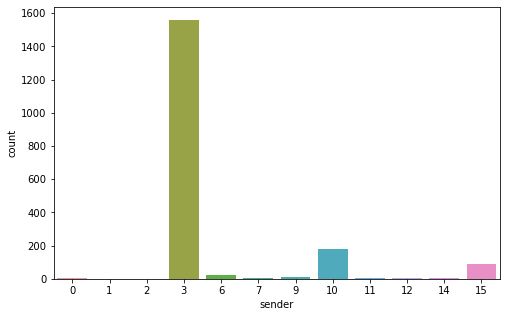

In [26]:
mpl.figure(figsize=(8,5))
sns.countplot('sender',data=df_train)
mpl.show()

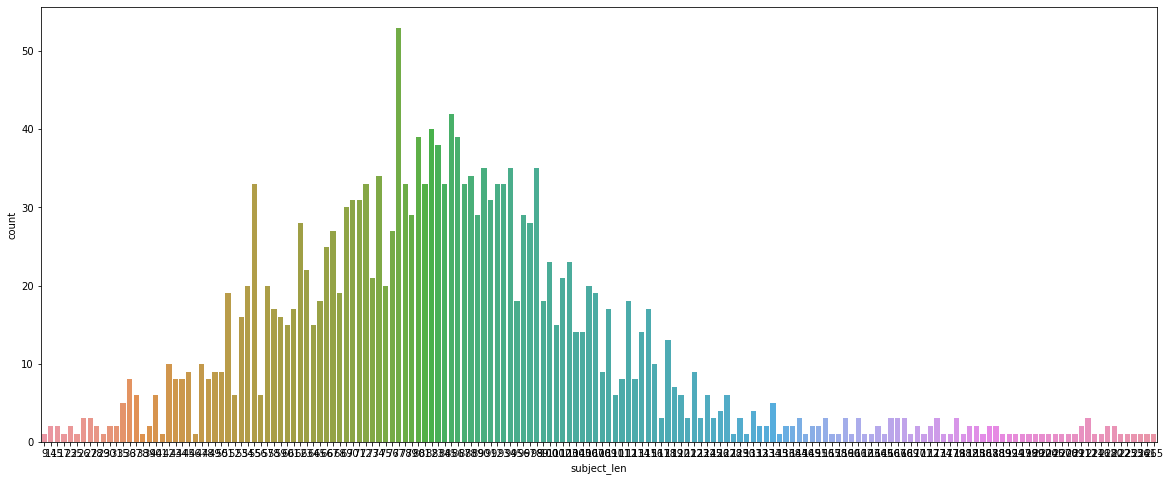

In [27]:
mpl.figure(figsize=(20,8))
sns.countplot('subject_len',data=df_train)
mpl.show()

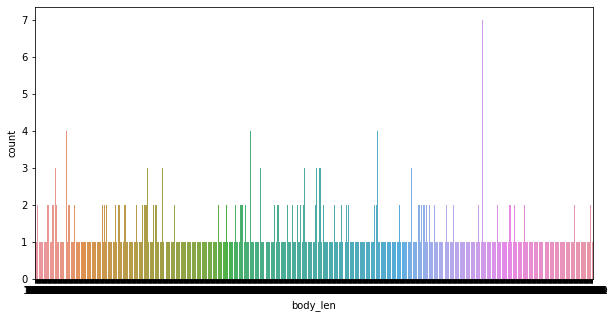

In [28]:
mpl.figure(figsize=(10,5))
sns.countplot('body_len',data=df_train)
mpl.show()

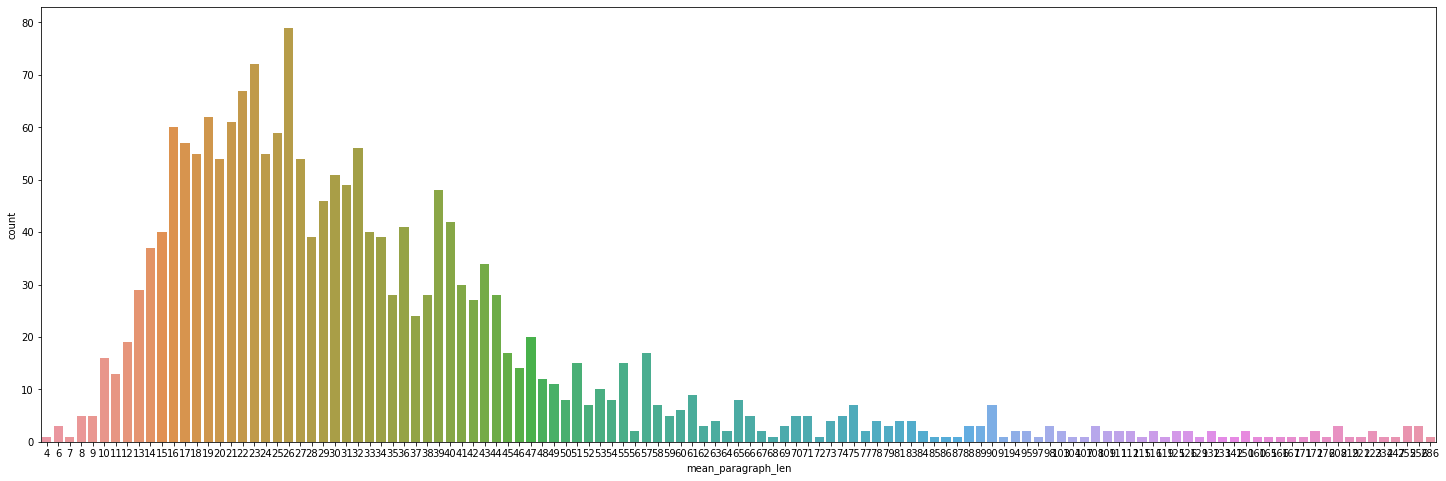

In [29]:
mpl.figure(figsize=(25,8))
sns.countplot('mean_paragraph_len',data=df_train)
mpl.show()

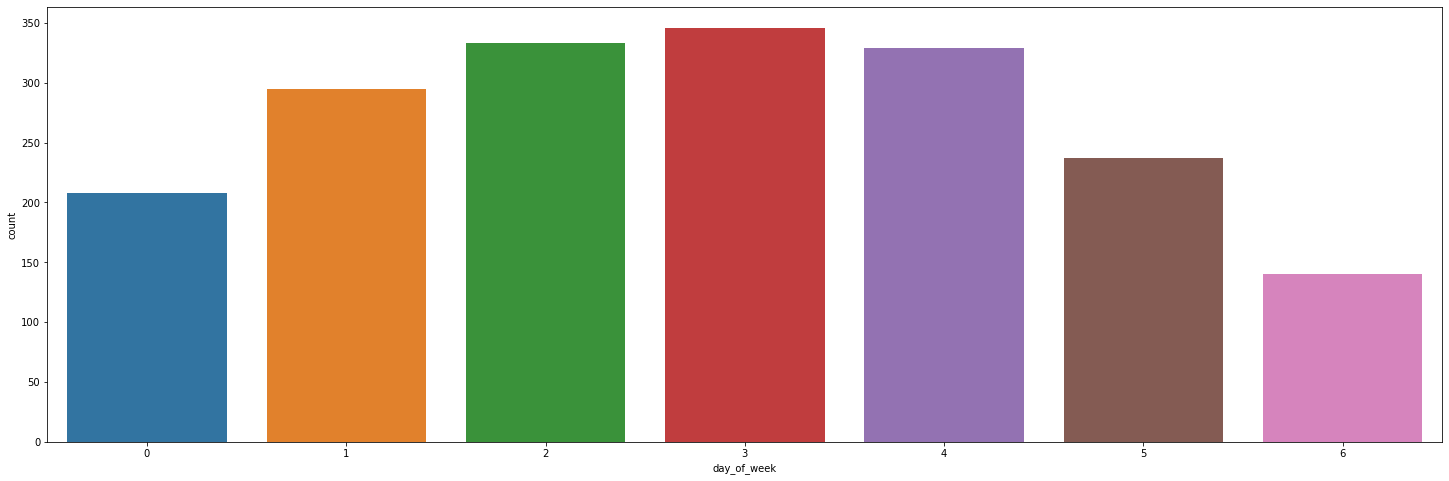

In [30]:
mpl.figure(figsize=(25,8))
sns.countplot('day_of_week',data=df_train)
mpl.show()

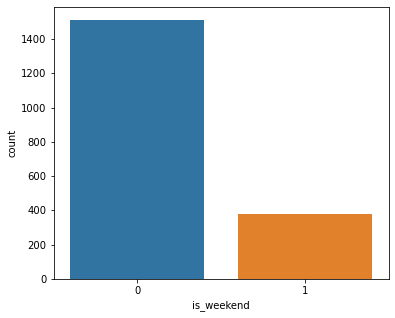

In [31]:
mpl.figure(figsize=(6,5))
sns.countplot('is_weekend',data=df_train)
mpl.show()

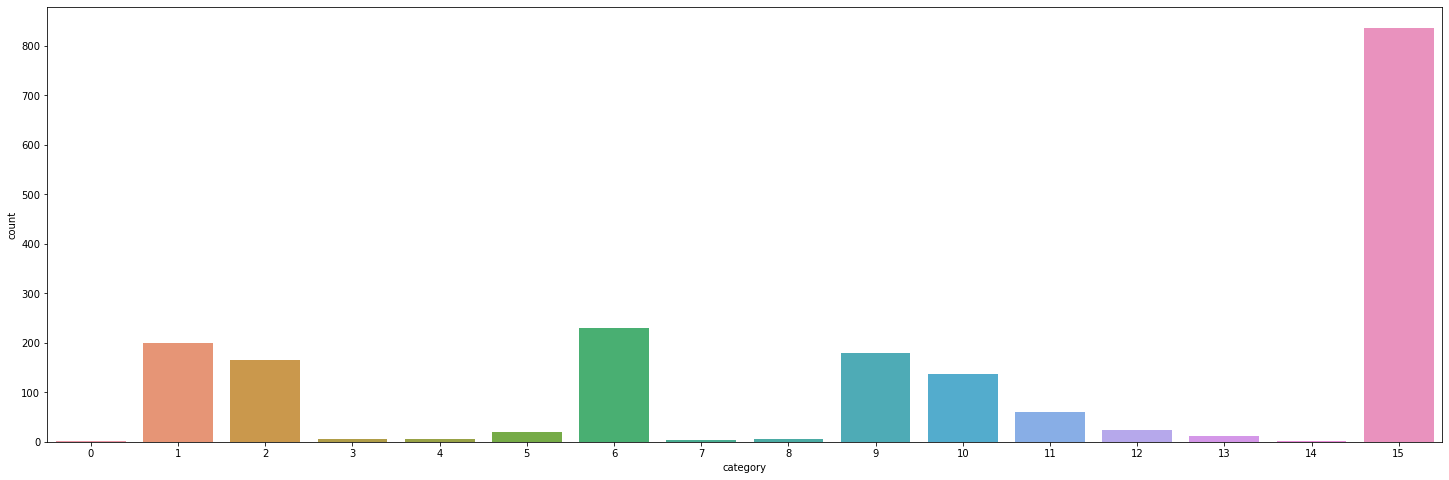

In [32]:
mpl.figure(figsize=(25,8))
sns.countplot('category',data=df_train)
mpl.show()

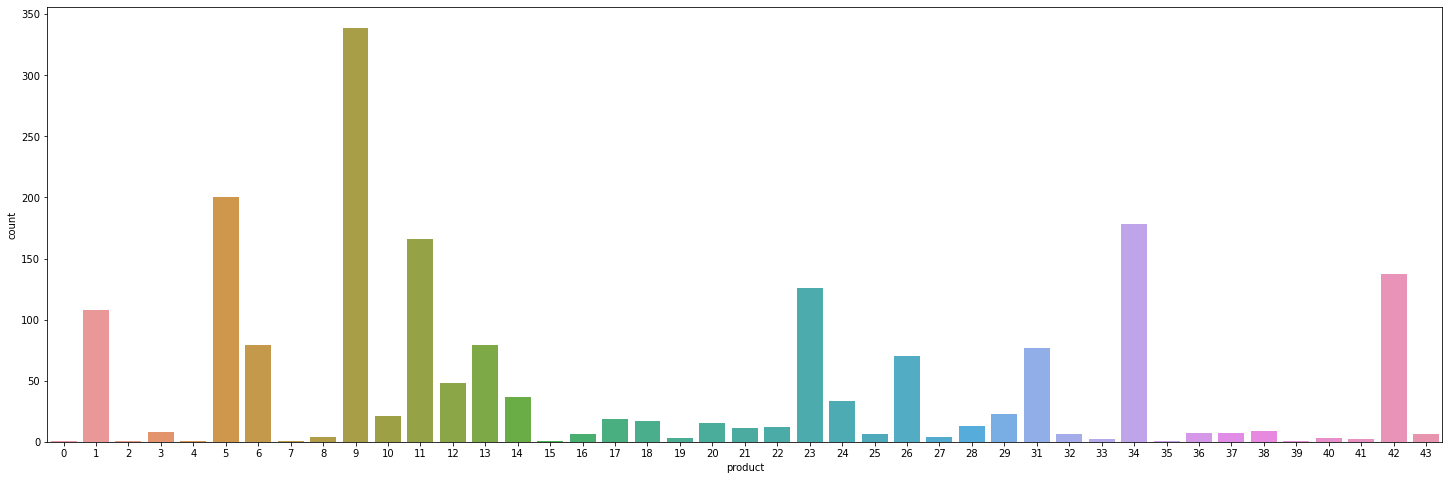

In [33]:
mpl.figure(figsize=(25,8))
sns.countplot('product',data=df_train)
mpl.show()

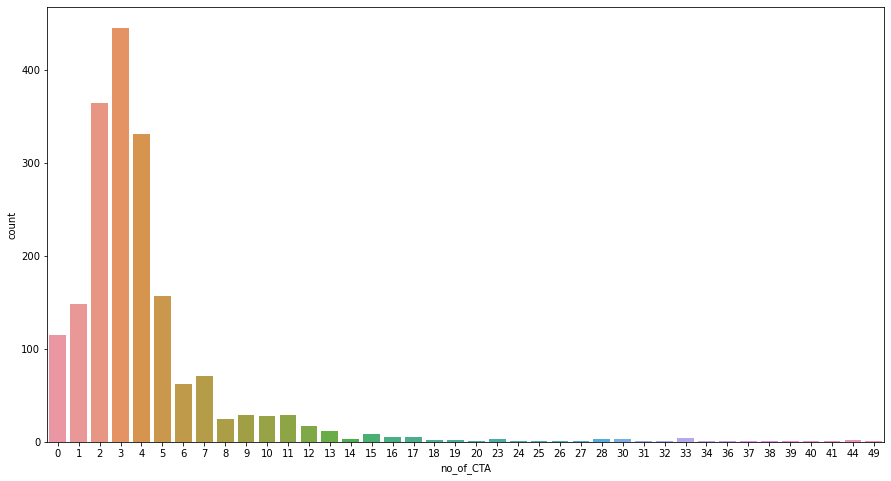

In [34]:
mpl.figure(figsize=(15,8))
sns.countplot('no_of_CTA',data=df_train)
mpl.show()

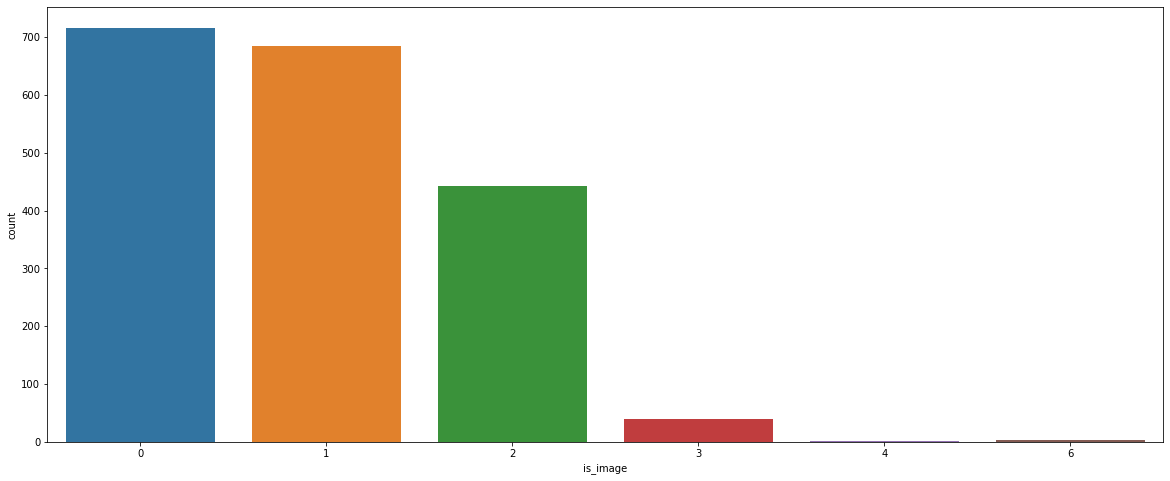

In [35]:
mpl.figure(figsize=(20,8))
sns.countplot('is_image',data=df_train)
mpl.show()

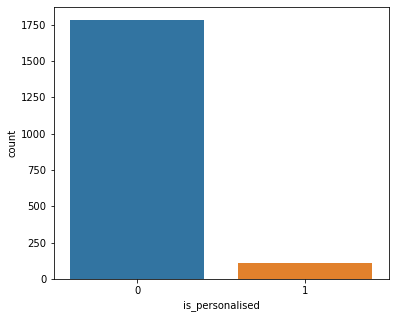

In [36]:
mpl.figure(figsize=(6,5))
sns.countplot('is_personalised',data=df_train)
mpl.show()

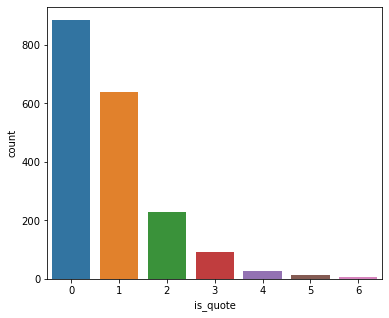

In [37]:
mpl.figure(figsize=(6,5))
sns.countplot('is_quote',data=df_train)
mpl.show()

In [38]:
count=[ 'is_quote',
 'is_timer',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience']

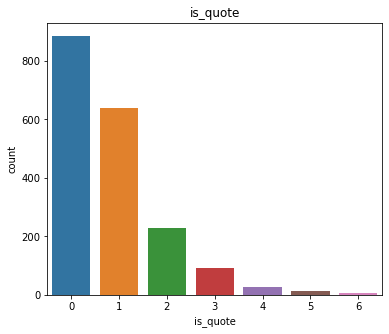

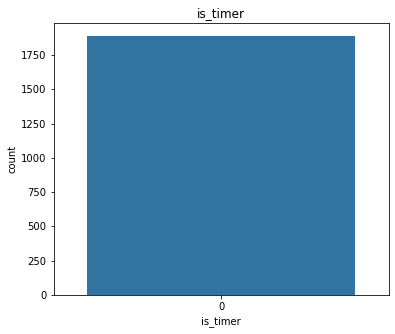

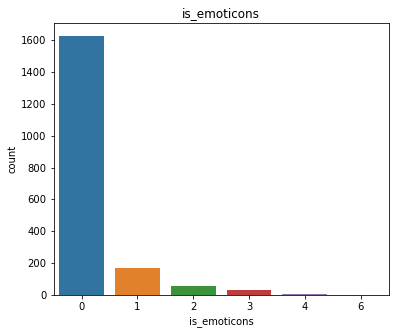

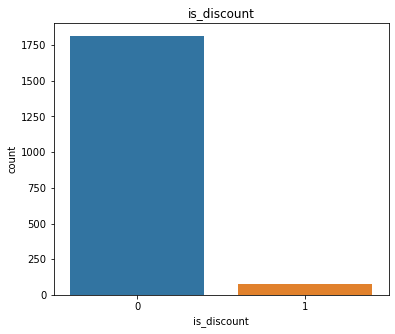

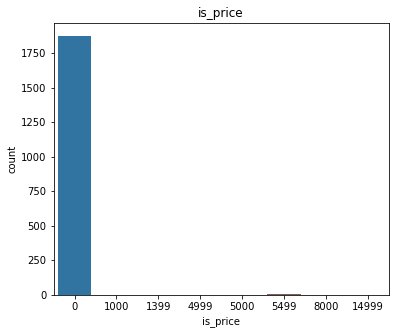

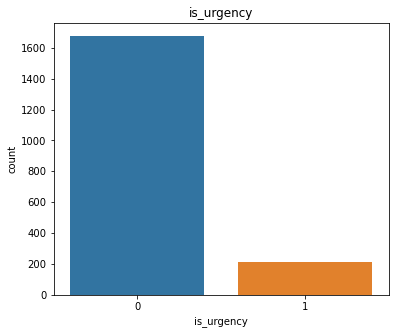

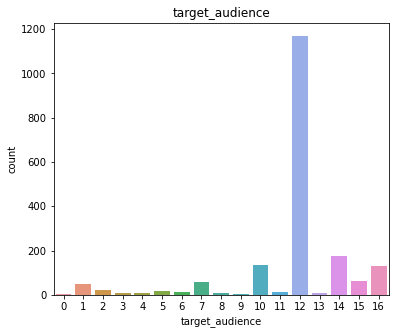

In [39]:
for i in count:
    mpl.figure(figsize=(6,5))
    sns.countplot(df_train[i],data=df_train)
    mpl.title(i)
    mpl.show()

In [40]:
df_test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

In [41]:
counttest=['sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience']

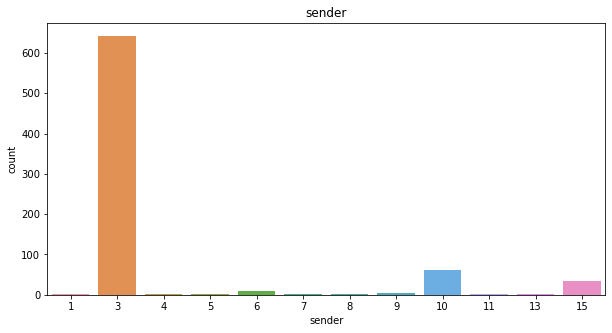

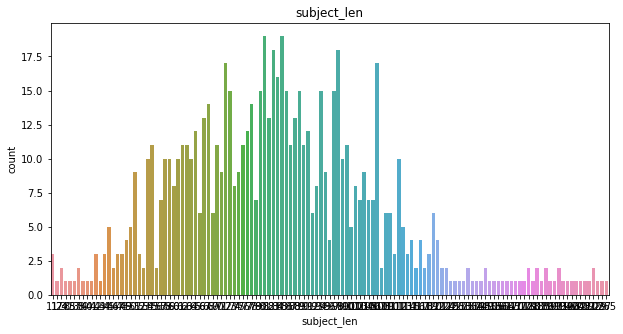

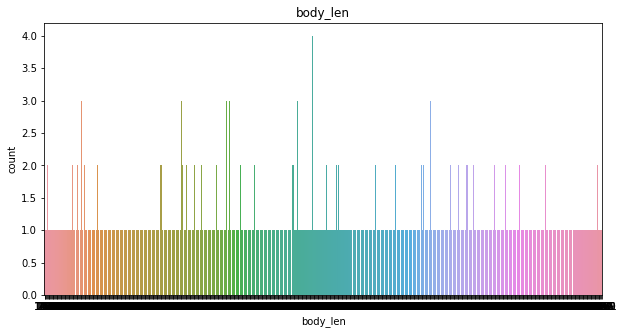

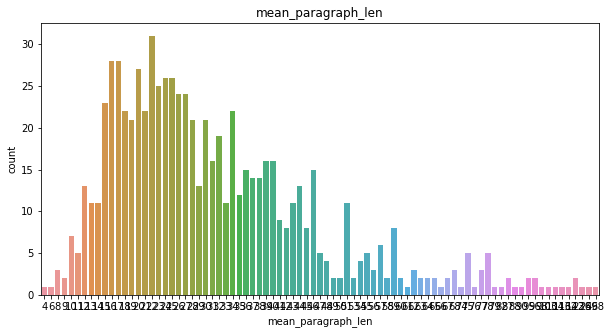

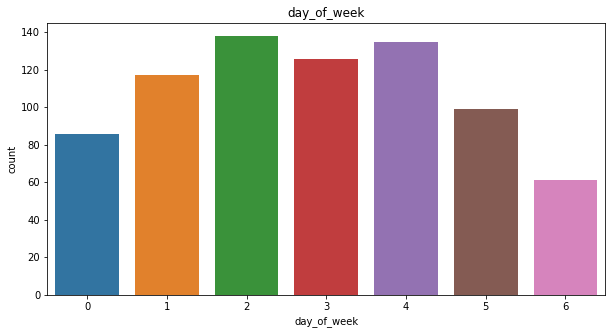

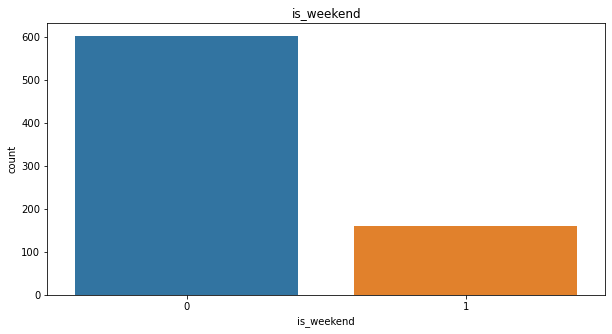

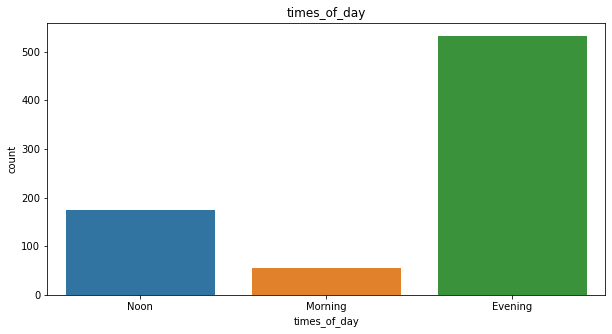

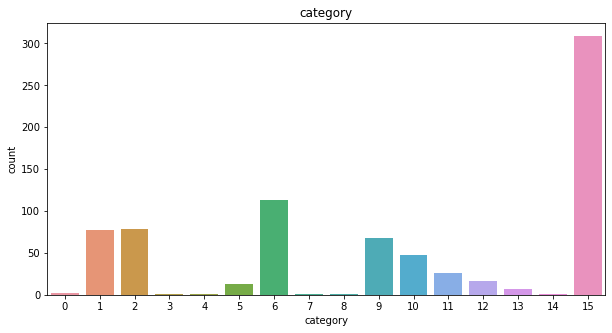

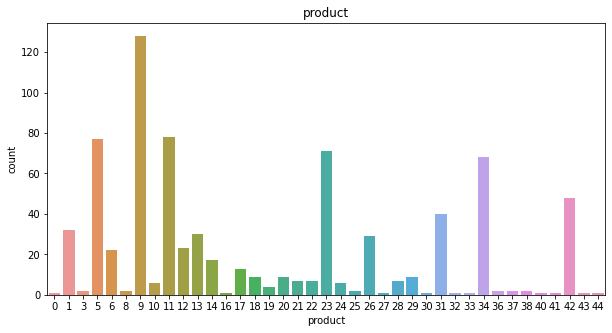

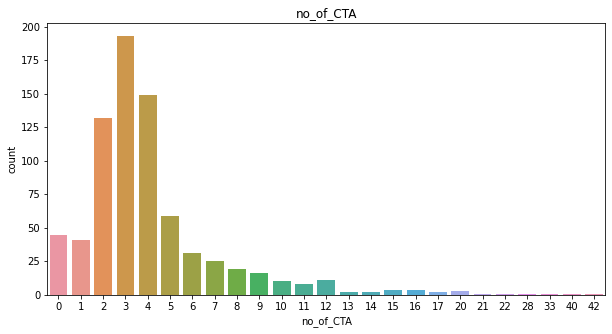

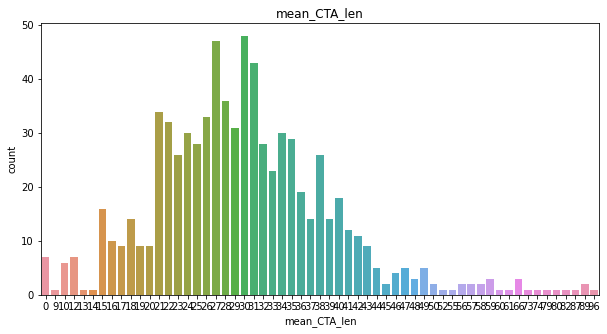

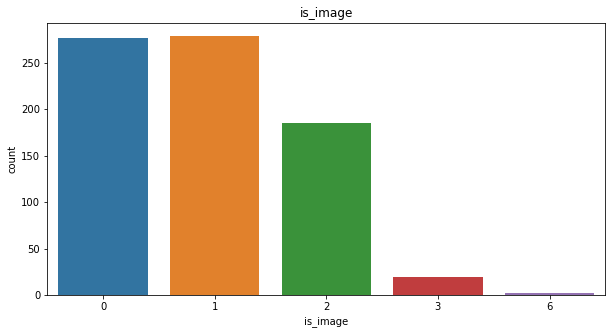

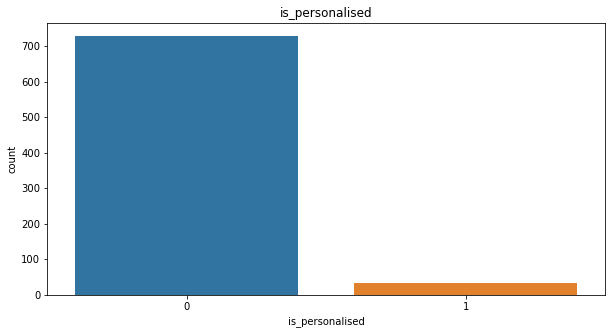

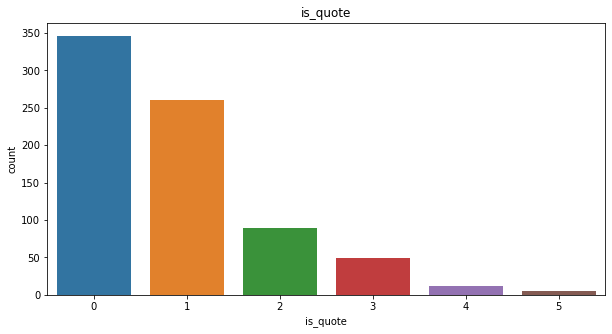

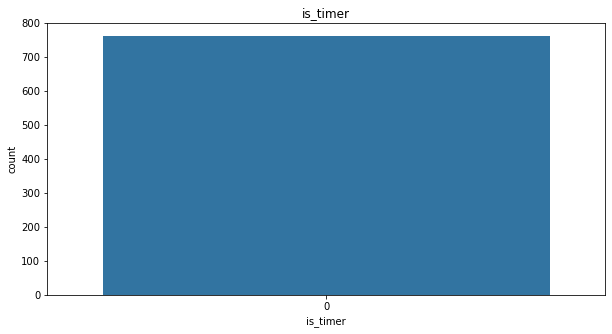

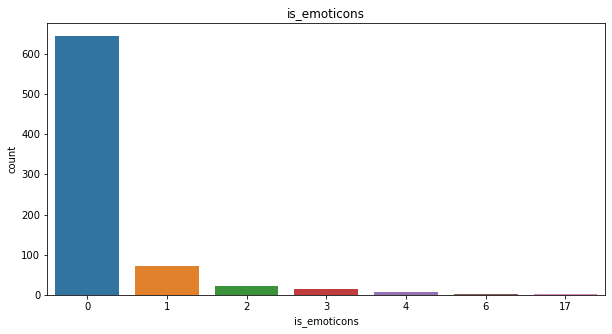

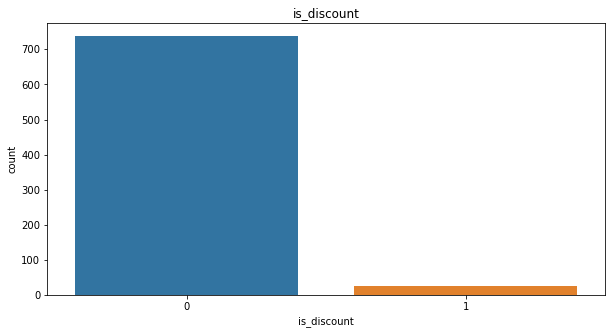

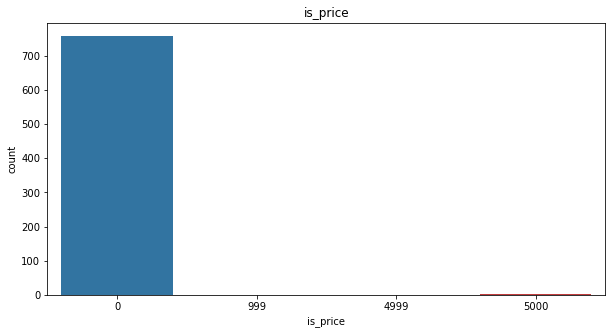

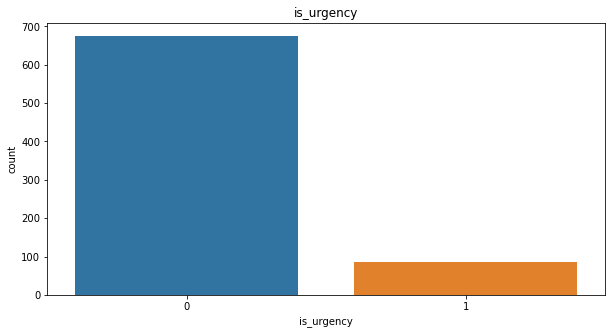

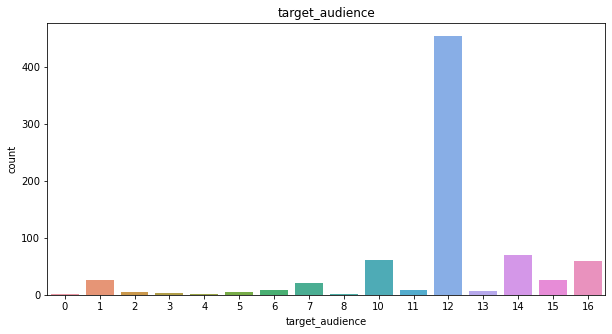

In [42]:
for i in counttest:
    mpl.figure(figsize=(10,5))
    sns.countplot(df_test[i],data=df_test)
    mpl.title(i)
    mpl.show()

In [43]:
df_train.drop(['is_timer'],axis=1,inplace=True)
df_test.drop(['is_timer'],axis=1,inplace=True)

In [44]:
df_train.shape,df_test.shape

((1888, 21), (762, 20))

# Categorical encoding

In [45]:
cate

['times_of_day']

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['times_of_day']=le.fit_transform(df_train['times_of_day'])
df_test['times_of_day']=le.fit_transform(df_test['times_of_day'])
#df_train=pd.get_dummies(df_train,drop_first=True)
#df_test=pd.get_dummies(df_test,drop_first=True)

In [47]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


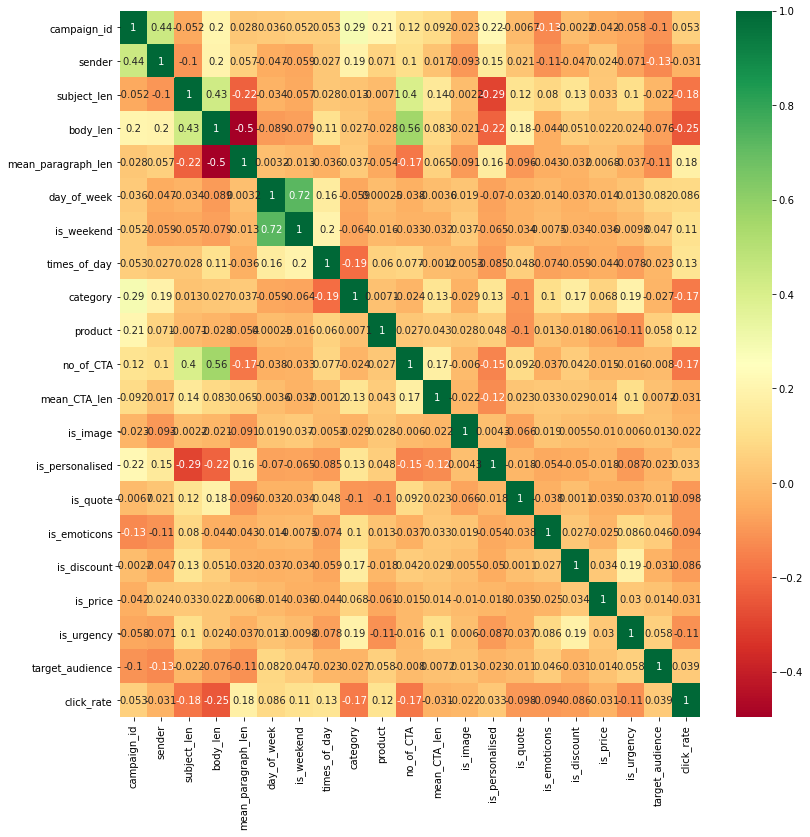

In [48]:
corelation=df_train.corr()
mpl.figure(figsize=(13,13))
g=sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")

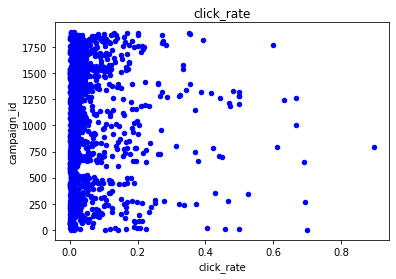

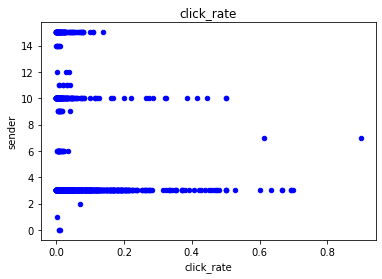

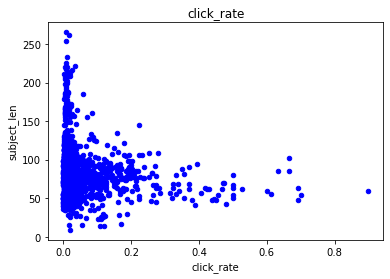

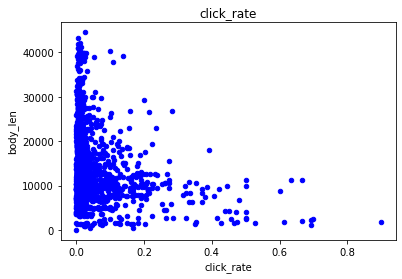

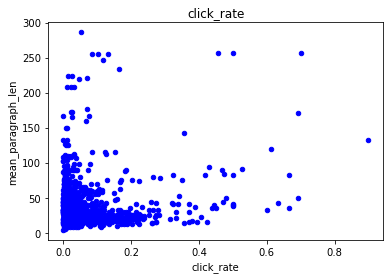

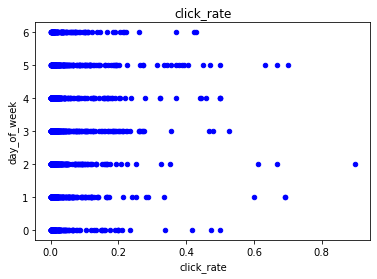

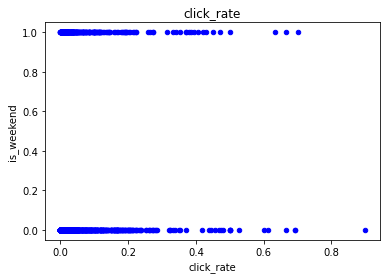

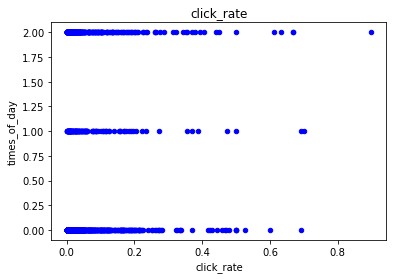

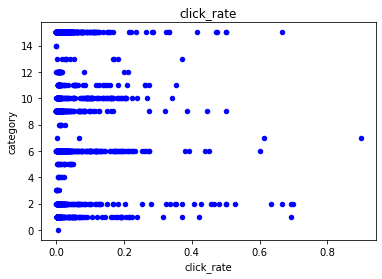

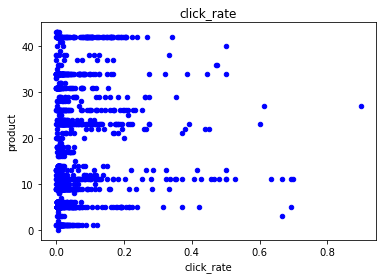

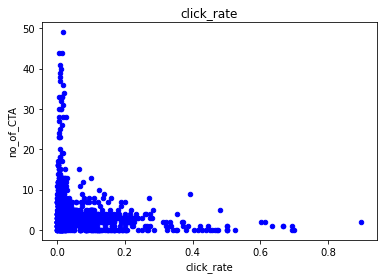

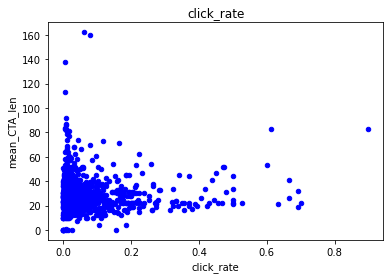

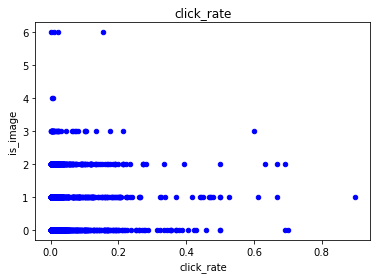

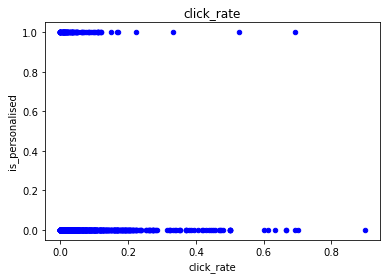

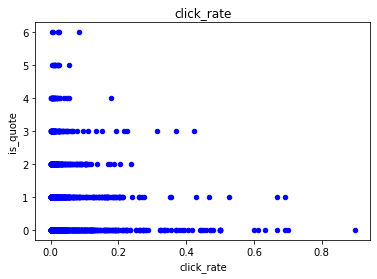

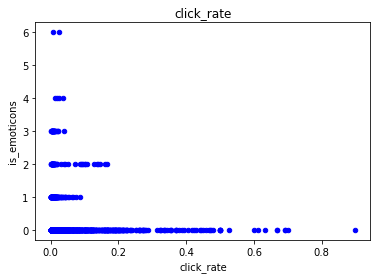

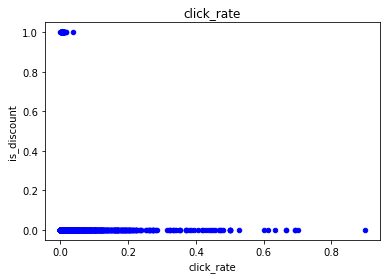

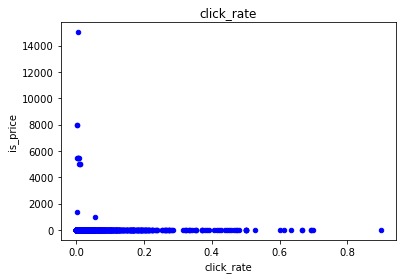

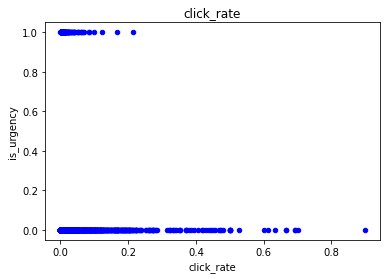

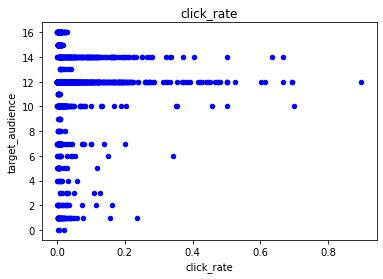

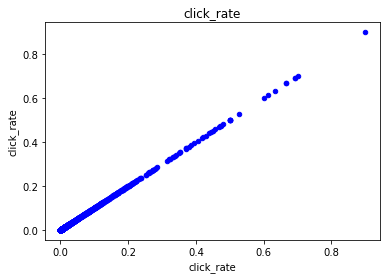

In [49]:
for i in df_train:
    df_train.plot.scatter(y=i,x='click_rate',color='blue',title='click_rate')

In [50]:
x_train=df_train.drop(['campaign_id','click_rate'],axis=1)
y_train=df_train[['click_rate']]

In [51]:
x_train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,14
1,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,16
3,3,74,11037,30,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10
4,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,14


In [52]:
df_test.drop(['campaign_id'],axis=1,inplace=True)

In [53]:
df_test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,61,12871,11,6,1,2,6,26,3,37,1,0,0,1,0,0,0,14
1,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,3,88,1473,78,4,0,0,2,11,0,22,1,0,1,0,0,0,0,10
3,3,88,1473,78,3,0,0,2,11,0,22,1,0,1,0,0,0,0,10
4,3,78,9020,29,3,0,2,6,26,2,40,0,0,0,0,0,0,0,14


# Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20)

In [55]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression(normalize=True)
LR.fit(x_train,y_train)

LinearRegression(normalize=True)

In [56]:
y_pred=LR.predict(x_test)

<AxesSubplot:xlabel='click_rate'>

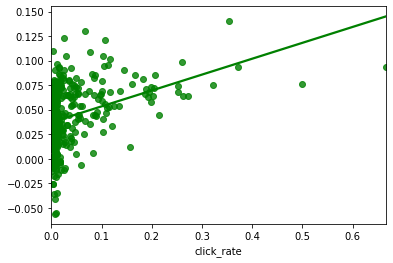

In [57]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="g")

In [58]:
from sklearn.metrics import mean_squared_error as mse
error=mse(y_test,y_pred)
print(error)

0.0043005051241546835


In [59]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:%.2f" % r2_score(y_test,y_pred))
print("mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

R2 score:0.13
mean squared error:0.00


In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 150)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 212, 224, 236, 248, 260, 272, 284, 296, 308, 320, 332, 344, 357, 369, 381, 393, 405, 417, 429, 441, 453, 465, 477, 489, 502, 514, 526, 538, 550, 562, 574, 586, 598, 610, 622, 634, 646, 659, 671, 683, 695, 707, 719, 731, 743, 755, 767, 779, 791, 804, 816, 828, 840, 852, 864, 876, 888, 900, 912, 924, 936, 948, 961, 973, 985, 997, 1009, 1021, 1033, 1045, 1057, 1069, 1081, 1093, 1106, 1118, 1130, 1142, 1154, 1166, 1178, 1190, 1202, 1214, 1226, 1238, 1251, 1263, 1275, 1287, 1299, 1311, 1323, 1335, 1347, 1359, 1371, 1383, 1395, 1408, 1420, 1432, 1444, 1456, 1468, 1480, 1492, 1504, 1516, 1528, 1540, 1553, 1565, 1577, 1589, 1601, 1613, 1625, 1637, 1649, 1661, 1673, 1685, 1697, 1710, 1722, 1734, 1746, 1758, 1770, 1782, 1794, 1806, 1818, 1830, 1842, 1855, 1867, 1879, 1891, 1903, 1915, 1927, 1939, 1951, 1963, 1975, 1987, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110, None], 'min_sample

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [200, 212, 224, 236,
                                                         248, 260, 272, 284,
                                                         296, 308, 320, 332,
                                                         344, 357, 369, 381,


In [ ]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 3000)
    max_depth = trial.suggest_int('max_depth', 2,100)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])

    ### modeling with suggested params
    model = RandomForestRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 criterion = criterion,
                                 random_state = 0) # do not tune the seed

    ### cross validation score
    # score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    # etr_score = score.mean()

    ### fit
    model.fit(x_train, y_train) # train on train data
    accuracy = round(model.score(x_test, y_test), 5) # validate on validation data

    return accuracy
    
study = optuna.create_study(direction='maximize') # maximize accuracy
study.optimize(objective, n_trials=30)

[I 2022-08-07 19:20:12,369] A new study created in memory with name: no-name-c78fcd90-39ec-49ea-8444-07192665a9dd
[I 2022-08-07 19:20:15,185] Trial 0 finished with value: 0.29855 and parameters: {'n_estimators': 421, 'max_depth': 42, 'max_leaf_nodes': 13, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.29855.
[I 2022-08-07 19:20:22,370] Trial 1 finished with value: 0.51447 and parameters: {'n_estimators': 900, 'max_depth': 56, 'max_leaf_nodes': 64, 'criterion': 'squared_error'}. Best is trial 1 with value: 0.51447.
[I 2022-08-07 19:22:28,570] Trial 2 finished with value: 0.0604 and parameters: {'n_estimators': 1239, 'max_depth': 88, 'max_leaf_nodes': 14, 'criterion': 'absolute_error'}. Best is trial 1 with value: 0.51447.
[I 2022-08-07 19:22:31,933] Trial 3 finished with value: 0.14226 and parameters: {'n_estimators': 951, 'max_depth': 69, 'max_leaf_nodes': 6, 'criterion': 'squared_error'}. Best is trial 1 with value: 0.51447.
[I 2022-08-07 19:28:24,213] Trial 4 finished w

In [ ]:
y_predict=rf_random.predict(x_test)

In [ ]:
rf_random.best_params_

In [ ]:
print("R2 score:%.2f" % r2_score(y_test,y_predict))
print("mean squared error:%.2f"%mean_squared_error(y_test,y_predict))

In [ ]:
y_pred1=LR.predict(x_test)

In [ ]:
sns.regplot(x=y_test, y=y_predict, ci=None, color="g")

In [ ]:
print("R2 score:%.2f" % r2_score(y_test,y_pred1))
print("mean squared error:%.2f"%mean_squared_error(y_test,y_pred1))

In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.03)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_train_lasso)))
print(r2_score(y_test, pred_train_lasso))

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.03)
rr.fit(x_train, y_train)
pred_train_rr= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_train_rr)))
print(r2_score(y_test, pred_train_rr))

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
predi2=regressor.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,predi2)))
print(r2_score(y_test, predi2))

In [ ]:
#hyper parameter tuning for extratree regressor
from sklearn.model_selection import RandomizedSearchCV
#n_estimators parameters values
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 150)]
#criterion parameters with in list
criterion=['squared_error', 'absolute_error']
#minimum sample splite required
min_samples_split=[2,4,6,8,10]
#minimum sample leaves required
min_samples_leaf=[3,5,7,9]
# Method of selecting samples for training each tree
bootstrap=[True,False]
#required alpha value
ccp_alpha=[0.0,0.01,0.001]
random={
    'n_estimators': n_estimators,
    'criterion': criterion,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap,
    'ccp_alpha':ccp_alpha
}
print(random)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg=ExtraTreesRegressor()
rf_r = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_r.fit(x_train,y_train)
p=rf_r.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,p)))
print(r2_score(y_test, p))

In [ ]:
rf_r.best_params_

In [ ]:
reg.fit(x_train,y_train)
p=reg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,p)))
print(r2_score(y_test, p))